In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def U(x, c_1, c_2, gamma_1, gamma_2):
    
    y = c_1 * x ** (1-gamma_1) / (1-gamma_1) + c_2 * x ** (1-gamma_2) / (1-gamma_2) 
    
    return y

In [3]:
def sharp_coef(beta, sigma, theta, rho, eps, delta):
    
    x = 0.5 * (beta * rho * (eps ** delta) / sigma) ** 2 + (theta / sigma) ** 2
    
    return x

In [4]:
def fun(x, c_1, c_2, gamma_1, gamma_2):
    
    a = 1.0 * x * (c_1 + c_2 * x ** (gamma_1 - gamma_2)) 
    b = 1.0 * (c_1 * gamma_1 + gamma_2 * c_2 * x ** (gamma_1 - gamma_2)) 
    
    return a/b

In [5]:
def g_12(t,sharp,T):
    
    y = sharp * (1-gamma_1) * (gamma_2 - 0.5 * gamma_1)*(T-t)/ gamma_2 ** 2
    
    return np.exp(y)

In [6]:
def g_2(t,sharp,T):
    
    y = sharp * 0.5 * (1-gamma_2) * (T-t) / gamma_2
    
    return np.exp(y)

In [7]:
#при x >> 0
def v_0(t, x, c_1, c_2, gamma_1, gamma_2, sharp):
    
    y = c_1 * x ** (1-gamma_1) / (1-gamma_1) * g_12(t,sharp,T) + c_2 * x ** (1-gamma_2) / (1-gamma_2) * g_2(t,sharp,T)
    
    return y

In [8]:
#при x >> 0
def dv_0_dx(t, x, c_1, c_2, gamma_1, gamma_2, sharp):
    
    y = c_1 * x ** (-gamma_1) * g_12(t,sharp,T) + c_2 * x ** (-gamma_2) * g_2(t,sharp,T)
    
    return y

In [9]:
# dv_0_dx(0, 20.0, c_1, c_2, gamma_1, gamma_2, 0.5)

In [10]:
def integral(a,b,x,y):
    
    I = 0
    
    for i in range(len(x) - 1):
        
        if x[i] >= a  and  x[i+1] <= b:
        
            I += 0.5 * (x[i+1]-x[i]) * (y[i]+y[i+1])
    
    return I

In [11]:
def f(N, T, x_max, gamma_1, gamma_2, c_1, c_2, beta, sigma, theta, rho, eps, delta):
    
    
    sharp = sharp_coef(beta, sigma, theta, rho, eps, delta) 
    
    #давайте лучше определим целое число шагов, а по шагам определим размер шага
    
    
    B = N 
    
    #дельта x
    x = x_max / (B-1)
    
    print('sharpe coeff: ', sharp)
    
    A = int(sharp * N ** 2) * 12
    
    #дельта t
    t = T / (A-1)
    
    r = np.zeros(A * B)
    
    for j in range(1,B-1):
        r[j] = fun(j * x, c_1, c_2, gamma_1, gamma_2)  

    r[B - 1] = x  / gamma_2 + r[B-2]
    
    #уменьшаем T на шаг дельта t
    for n in range(0, A - 1):
        
        for j in range(1,B - 1):
            
            
            K = 1.0 * (r[n * B + j + 1] - 2.0 * r[n * B + j] + r[n * B + j - 1]) / (x ** 2)
            
            r[(n + 1) * B + j] = r[n * B + j] + 0.5 * t * sharp * (r[n * B + j]) ** 2 * K         
            
        #равенство производной 1/gamma_2 конце
        r[(n + 1) * B + B - 1] = x / gamma_2 + r[(n + 1) * B + B - 2]    
            
    
    return r, sharp, A, B

In [80]:
def plot(x_max, B, A_full, A_part,  r_full, r_part):
    
#     x_max = 20.0

    x = np.zeros(B)
    
    x = [i * x_max / (B-1) for i in range(B)]
    
    y_0_full = np.zeros(B)
    y_0_part = np.zeros(B)
    y_T = np.zeros(B)
    
    y_T = r_full[:B]    
    y_0_full = r_full[-B:] 
    y_0_part = r_part[-B:] 
        

    plt.figure(figsize = (10,10))
    plt.plot(x,y_0_full,label = 'R(0,x) full info', color = 'green', linewidth = 4)
    plt.plot(x,y_0_part,label = 'R(0,x) partial info',  color = 'orange', linewidth = 4)
    plt.plot(x,y_T,label = 'R(T,x)', color = 'darkblue', linewidth = 4, linestyle = ':')
    plt.grid()
    plt.title('RISK TOLERANCES', fontsize=20)
    plt.xlim((0,20))
    plt.ylim((0,100))
    plt.xlabel('Wealth x', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(loc= 'upper left', fontsize=20)
    plt.show() 

In [74]:
x_max = 20.0
T = 1.0
N = 41
gamma_1 = 1.2
gamma_2 = 0.25
c_1 = 0.5
c_2 = 0.5

beta, sigma, theta, eps, delta = 0.2, 0.2, 0.05, 0.1, 0

rho_full = 1.0
rho_part = -0.3

In [14]:
r_full, sharp_full, A_full, B = f(N,T, x_max, gamma_1, gamma_2, c_1, c_2, beta, sigma, theta, rho_full , eps, delta)

r_part, sharp_part, A_part, B = f(N,T, x_max, gamma_1, gamma_2, c_1, c_2, beta, sigma, theta, rho_part , eps, delta)

sharpe coeff:  0.5625
sharpe coeff:  0.1075


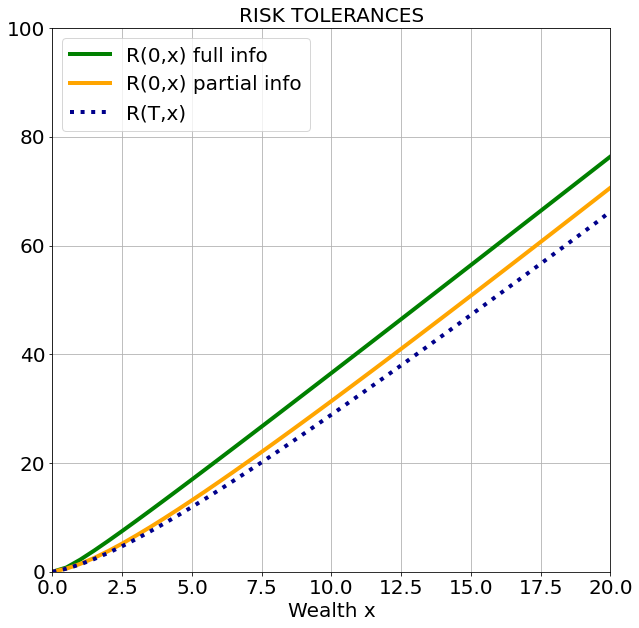

In [81]:
plot(x_max, B, A_full, A_part,  r_full, r_part)

In [16]:
#находим численно производную v_0:

def find_dv_0_dx(t,r,T,x_max,A,B, c_1, c_2, gamma_1, gamma_2, sharp):
    
    x = np.zeros(B)
    y = np.zeros(B)
    
    #задается подинтегральная функция
    ox = np.zeros(B)
    oy = np.zeros(B)
    
    
    num = A - 1 - int(1.0 * t / (T / (A-1))) 
    
    for i in range(B):
        
        ox[i] = i * x_max / (B-1)
        
        if r[num * B + i] < 1e-12:
            
            z = 1e-6
        else:
            z = r[num * B + i]
            
        oy[i] = 1.0 / z
    
    
    a = dv_0_dx(t, x_max, c_1, c_2, gamma_1, gamma_2, sharp)
    
    x = ox
    
    for j in range(B):
        
        y[j] = a * np.exp( integral(x[j], x_max, ox, oy))
    
    #возвращаем массив аргументов и значений функции
    
    return x,y

In [17]:
#находим численно v_0:

def find_v_0(t, r, T, x_max, A, B, c_1, c_2, gamma_1, gamma_2, sharp):
    
    
    #подинтегральная функция
    ox, oy = find_dv_0_dx(t,r ,T ,x_max ,A , B, c_1, c_2, gamma_1, gamma_2, sharp)
    
    #записываем поточечно v_0(t,x) в зависимости от х
    x = np.zeros(B)
    y = np.zeros(B)

    
    a = v_0(t, x_max, c_1, c_2, gamma_1, gamma_2, sharp)
    
    for j in range(B):
        
        x[j] = j * x_max / (B-1)
        
        y[j] = a - integral(x[j], x_max, ox, oy)
        
#         if j == 40:
            
#             print(y[j])
#             print(a)
#             print(integral(x[j], x_max, ox, oy))
        
# #         print(integral(x[j], x_max, ox, oy))
    
    #возвращаем массив аргументов и значений функции 
    return x,y,ox,oy

In [18]:
x, y_full, ox, oy_full = find_v_0(0, r_full, T, x_max, A_full, B, c_1, c_2, gamma_1, gamma_2, sharp_full)
x, y_part, ox, oy_part = find_v_0(0, r_part, T, x_max, A_part, B, c_1, c_2, gamma_1, gamma_2, sharp_part)

<ipython-input-16-de75a04b7477>:34: RuntimeWarning: overflow encountered in exp
  y[j] = a * np.exp( integral(x[j], x_max, ox, oy))


In [67]:
def plot_v_0(x,y_full, y_part):
    
    x = x
    y_T = np.zeros(len(x))
        
    for i in range(len(x)):
        
        if x[i] < 1e-12:
            z = 1e-6
        else:
            z = x[i]
            
        y_T[i] = U(z, c_1, c_2, gamma_1, gamma_2)
        

    plt.figure(figsize = (10,10))
    plt.plot(x[1:],y_full[1:],label = 'V(0,x) full info', color = 'green', linewidth = 4)
    plt.plot(x[1:],y_part[1:],label = 'V(0,x) partial info', color = 'orange',linewidth = 4)
    plt.plot(x[1:],y_T[1:],label = 'V(T,x)', color = 'darkblue', linewidth = 4, linestyle = ':')

    plt.grid()
    plt.title('VALUE FUNCTION',  fontsize=20)
    plt.xlim((0,20))
    plt.ylim((-10,20))
    plt.xlabel('Wealth x',  fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(loc= 'upper left', fontsize=20)
    plt.show() 

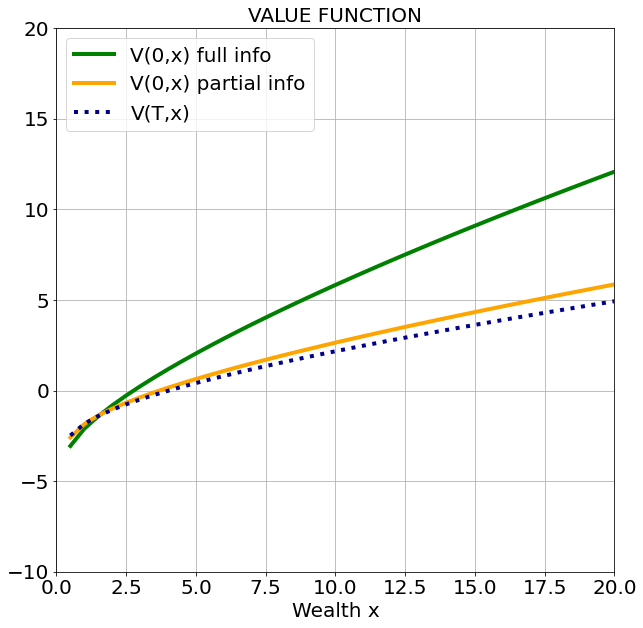

In [68]:
plot_v_0(x,y_full, y_part)

In [22]:
# plot_v_0(ox,oy_full, oy_part)